# Exploring Dandiset 001359: Human Patch-seq Electrophysiology from the Allen Institute

> **Note**: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results and validate important findings independently.

## Overview

This notebook explores Dandiset 001359 (version 0.250401.1603), which contains patch-clamp electrophysiology recordings from human neurons as part of the Allen Institute's patch-seq initiative. Patch-seq combines whole-cell patch-clamp electrophysiology recordings with single-cell RNA sequencing, allowing researchers to correlate electrical properties with gene expression in the same cells.

The dataset contains recordings from human neurons using various protocols, including subthreshold and suprathreshold current steps, voltage clamp protocols, and more, providing a wealth of information about the electrophysiological properties of these cells.

[Link to Dandiset](https://dandiarchive.org/dandiset/001359/0.250401.1603)

## Required Packages

The following packages are needed to run this notebook:
- `pynwb` - For working with NWB files
- `h5py` - For working with HDF5 files
- `remfile` - For remotely accessing files
- `numpy` - For numerical operations
- `matplotlib` - For plotting
- `pandas` - For data manipulation

In [1]:
# Import required packages
import pynwb
import h5py
import remfile
from itertools import islice
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dandi.dandiapi import DandiAPIClient

# Set up plotting configuration
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.grid'] = True

## Loading the Dandiset

We'll use the DANDI API to access the Dandiset and list its assets.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001359", "0.250401.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata['description']}")
# Handle different format of contributors (could be dict or string)
contributors = metadata['contributor']
if isinstance(contributors, list):
    if all(isinstance(c, str) for c in contributors):
        contributors_str = ', '.join(contributors)
    else:
        # If contributors contains dictionaries, extract meaningful information
        contributors_str = ', '.join([str(c) if isinstance(c, str) else c.get('name', str(c)) for c in contributors])
else:
    contributors_str = str(contributors)
print(f"Contributors: {contributors_str}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: 20250331_AIBS_Patchseq_human
Dandiset URL: https://dandiarchive.org/dandiset/001359/0.250401.1603
Dandiset description: HMBA Lein PatchSeq upload (human) (Q1 2025)
Contributors: Gonzalez, Limary, Allen Institute for Brain Science, National Institute of Mental Health,  Kalmbach, Brian, Dalley, Rachel, Lein, Ed, Lee, Brian

First 5 assets:
- sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb (ID: 67dc935f-cbc1-4255-bfbf-b8a3b21dacf9)
- sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb (ID: 6ea1c410-f443-44ef-a471-41fdf7bc8760)
- sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb (ID: c269347a-2d4b-4b6a-8b7c-2ef303ff503d)
- sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb (ID: f9663375-c4d6-4a9a-941f-c93c8a7b333a)
- sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb (ID: e11626f5-2176-48fc-9c4e-26da02787ba3)


## Loading an NWB File

Let's load one of the NWB files to explore its contents in detail. We'll use a file from the subject "1203384279" which contains intracellular electrophysiology recordings.

In [3]:
# Define the asset ID for the NWB file we want to load
asset_id = "c269347a-2d4b-4b6a-8b7c-2ef303ff503d"
nwb_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
print(f"Loading NWB file from URL: {nwb_url}")

# Load the NWB file using remfile for remote access
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic metadata about the NWB file
print(f"\nNWB file identifier: {nwb.identifier}")
print(f"Session ID: {nwb.session_id}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject species: {nwb.subject.species}")
print(f"Subject sex: {nwb.subject.sex}")
print(f"Subject age: {nwb.subject.age}")
print(f"Institution: {nwb.institution}")

Loading NWB file from URL: https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB file identifier: 0b7926a648abdf35aa91c67131cbd47b1d9786dd72001bd7e2b454be71ac3a6c
Session ID: 1207262032
Session start time: 2022-09-06 17:44:39.146000+00:00
Subject ID: 1203384279
Subject species: Homo sapiens
Subject sex: M
Subject age: P21170.0D
Institution: Allen Institute for Brain Science


You can explore this file interactively on Neurosift at:
[Neurosift Viewer](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/c269347a-2d4b-4b6a-8b7c-2ef303ff503d/download/&dandisetId=001359&dandisetVersion=0.250401.1603)

## Structure of the NWB File

Let's examine the structure of the NWB file to understand what types of data are available.

In [4]:
# Examine the acquisition data
print("Acquisition data types:")
acquisition_types = {}
for series_name, series in nwb.acquisition.items():
    series_type = type(series).__name__
    if series_type not in acquisition_types:
        acquisition_types[series_type] = []
    acquisition_types[series_type].append(series_name)

for series_type, series_names in acquisition_types.items():
    print(f"  - {series_type}: {len(series_names)} series")
    if len(series_names) > 0:
        print(f"    Example: {series_names[0]}")

# Examine the stimulus data
print("\nStimulus data types:")
stimulus_types = {}
for series_name, series in nwb.stimulus.items():
    series_type = type(series).__name__
    if series_type not in stimulus_types:
        stimulus_types[series_type] = []
    stimulus_types[series_type].append(series_name)

for series_type, series_names in stimulus_types.items():
    print(f"  - {series_type}: {len(series_names)} series")
    if len(series_names) > 0:
        print(f"    Example: {series_names[0]}")

# Examine the sweep table
if hasattr(nwb, 'sweep_table'):
    sweep_df = nwb.sweep_table.to_dataframe()
    print(f"\nSweep table has {len(sweep_df)} entries")
    print(f"Sweep numbers range from {sweep_df['sweep_number'].min()} to {sweep_df['sweep_number'].max()}")
else:
    print("\nNo sweep table found")
    
# Examine processing modules
if hasattr(nwb, 'processing'):
    print("\nProcessing modules:")
    for module_name, module in nwb.processing.items():
        print(f"  - {module_name}: {module.description}")
        print(f"    Interfaces: {list(module.data_interfaces.keys())}")
else:
    print("\nNo processing modules found")

# Examine electrodes
if hasattr(nwb, 'icephys_electrodes'):
    print("\nIntracellular electrodes:")
    for electrode_name, electrode in nwb.icephys_electrodes.items():
        print(f"  - {electrode_name}: {electrode.description}")
        print(f"    Device: {electrode.device.description if hasattr(electrode.device, 'description') else 'Unknown'}")
else:
    print("\nNo intracellular electrodes found")

Acquisition data types:
  - VoltageClampSeries: 6 series
    Example: data_00000_AD0
  - CurrentClampSeries: 64 series
    Example: data_00004_AD0

Stimulus data types:
  - VoltageClampStimulusSeries: 6 series
    Example: data_00000_DA0
  - CurrentClampStimulusSeries: 64 series
    Example: data_00004_DA0

Sweep table has 140 entries
Sweep numbers range from 0 to 69

Processing modules:
  - spikes: detected spikes
    Interfaces: ['Sweep_10', 'Sweep_12', 'Sweep_14', 'Sweep_15', 'Sweep_17', 'Sweep_18', 'Sweep_20', 'Sweep_21', 'Sweep_23', 'Sweep_26', 'Sweep_33', 'Sweep_34', 'Sweep_36', 'Sweep_37', 'Sweep_38', 'Sweep_39', 'Sweep_41', 'Sweep_42', 'Sweep_5', 'Sweep_62', 'Sweep_63', 'Sweep_64', 'Sweep_65', 'Sweep_67', 'Sweep_7', 'Sweep_9']

Intracellular electrodes:
  - electrode_0: Headstage 0
    Device: Harvard Bioscience (formerly HEKA/Instrutech) Model: ITC18USB


## Examining Current Clamp Recordings

Current clamp recordings measure the voltage response of the cell while injecting a controlled current. Let's examine these recordings to understand the electrical properties of the neurons.

In [5]:
# Identify current-clamp recordings
current_clamp_series = []
for series_name in nwb.acquisition.keys():
    series = nwb.acquisition[series_name]
    if isinstance(series, pynwb.icephys.CurrentClampSeries):
        current_clamp_series.append(series_name)

print(f"Found {len(current_clamp_series)} current-clamp recording series")

# Group by stimulus description to identify protocols
stimulus_groups = {}
for series_name in current_clamp_series:
    series = nwb.acquisition[series_name]
    if series.stimulus_description not in stimulus_groups:
        stimulus_groups[series.stimulus_description] = []
    stimulus_groups[series.stimulus_description].append(series_name)

print("\nCurrent clamp protocols:")
for stim_desc, series_list in stimulus_groups.items():
    print(f"  - {stim_desc}: {len(series_list)} recordings")

Found 64 current-clamp recording series

Current clamp protocols:
  - X0NRMP_DA_0: 1 recordings
  - X1PS_SubThresh_DA_0: 22 recordings
  - X2LP_Search_DA_0: 6 recordings
  - X3LP_Rheo_DA_0: 3 recordings
  - X4PS_SupraThresh_DA_0: 7 recordings
  - X5SP_Search_DA_0: 19 recordings
  - X6SP_Rheo_DA_0: 3 recordings
  - X7RAMP_DA_0: 3 recordings


Let's visualize a current clamp recording with a step current injection protocol. This type of protocol is commonly used to characterize the passive membrane properties of neurons.

Examining current clamp recording: data_00005_AD0
Stimulus description: X1PS_SubThresh_DA_0
Bias current: -76.80925750732422 volts
Bridge balance: 10.805861473083496
Data shape: (182375,)


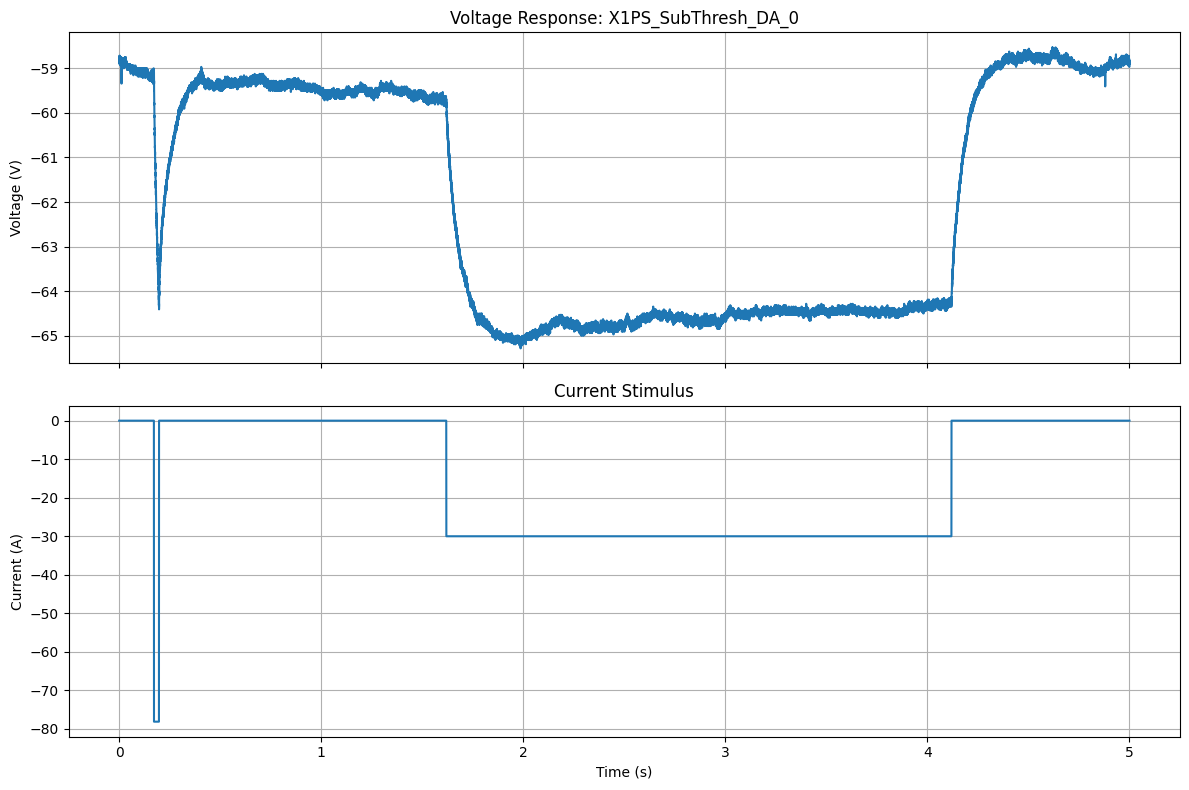

In [6]:
# Let's look at a subthreshold current step protocol
protocol = "X1PS_SubThresh_DA_0"
subthresh_series_names = stimulus_groups.get(protocol, [])

if subthresh_series_names:
    # Pick the first recording from this protocol
    series_name = subthresh_series_names[0]
    series = nwb.acquisition[series_name]
    
    # Get the corresponding stimulus
    stim_name = series_name.replace('_AD0', '_DA0')
    stim = nwb.stimulus.get(stim_name)
    
    # Print some information about this recording
    print(f"Examining current clamp recording: {series_name}")
    print(f"Stimulus description: {series.stimulus_description}")
    if hasattr(series, 'bias_current'):
        print(f"Bias current: {series.bias_current} {series.unit}")
    if hasattr(series, 'bridge_balance'):
        print(f"Bridge balance: {series.bridge_balance}")
    print(f"Data shape: {series.data.shape}")
    
    # Plot a portion of the data to see the subthreshold response
    # Get about 1-2 seconds of data, which should include a full step
    max_samples = 100000  # This should be enough for 1-2 seconds at typical sampling rates
    
    # Use a smaller number of samples to not overload memory
    num_samples = min(max_samples, series.data.shape[0])
    
    # Get the voltage response data
    voltage_data = series.data[:num_samples]
    
    # Get the stimulus data
    if stim is not None:
        current_data = stim.data[:num_samples]
    else:
        current_data = None
    
    # Create time values (in seconds)
    sampling_rate = 20000  # Assume 20 kHz if not specified
    time_values = np.arange(num_samples) / sampling_rate
    
    # Plot
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Plot voltage response
    axes[0].plot(time_values, voltage_data)
    axes[0].set_ylabel('Voltage (V)')
    axes[0].set_title(f'Voltage Response: {protocol}')
    axes[0].grid(True)
    
    # Plot current stimulus
    if current_data is not None:
        axes[1].plot(time_values, current_data)
        axes[1].set_xlabel('Time (s)')
        axes[1].set_ylabel('Current (A)')
        axes[1].set_title('Current Stimulus')
        axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()
else:
    print(f"No recordings found for protocol: {protocol}")

The above plot shows the membrane voltage response to a current step injection. This allows us to measure:

1. **Resting Membrane Potential**: The baseline voltage before stimulus application
2. **Input Resistance**: Calculated as the change in voltage divided by the injected current
3. **Membrane Time Constant**: How quickly the membrane potential responds to current input

These properties give us important information about the passive electrical characteristics of the neuron.

## Examining Action Potentials

Let's look at suprathreshold responses where action potentials are generated. This will help us understand the neuron's excitability properties.

Examining current clamp recording: data_00036_AD0
Stimulus description: X4PS_SupraThresh_DA_0


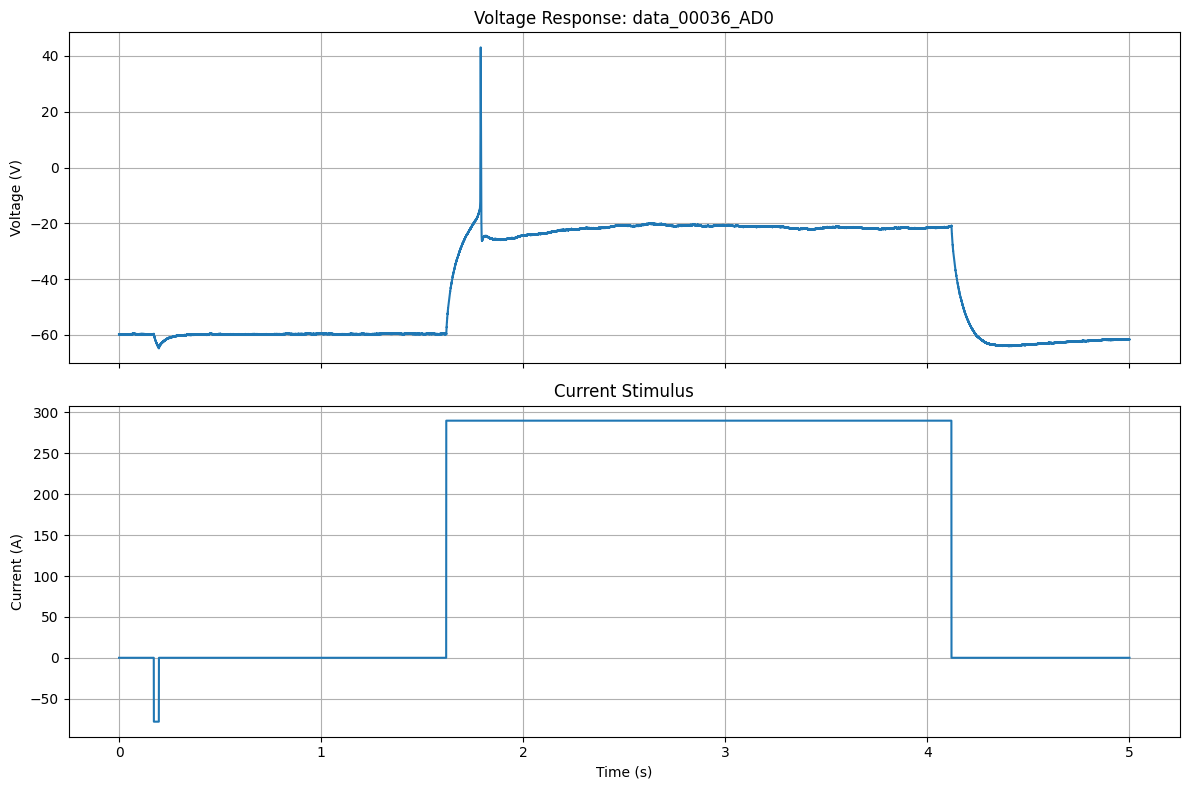

Action potentials detected in data_00036_AD0


In [7]:
# Let's look at a suprathreshold protocol
protocol = "X4PS_SupraThresh_DA_0"
suprathresh_series_names = stimulus_groups.get(protocol, [])

if not suprathresh_series_names:
    # Try another protocol that might have action potentials
    protocol = "X5SP_Search_DA_0"
    suprathresh_series_names = stimulus_groups.get(protocol, [])

if suprathresh_series_names:
    # Pick a recording from this protocol (try a few if needed)
    for series_idx, series_name in enumerate(suprathresh_series_names[:5]):
        series = nwb.acquisition[series_name]
        
        # Get the corresponding stimulus
        stim_name = series_name.replace('_AD0', '_DA0')
        stim = nwb.stimulus.get(stim_name)
        
        # Print some information about this recording
        print(f"Examining current clamp recording: {series_name}")
        print(f"Stimulus description: {series.stimulus_description}")
        
        # Get a portion of the data
        max_samples = 100000  # This should be enough for 1-2 seconds at typical sampling rates
        num_samples = min(max_samples, series.data.shape[0])
        
        # Get the voltage response data
        voltage_data = series.data[:num_samples]
        
        # Get the stimulus data
        if stim is not None:
            current_data = stim.data[:num_samples]
        else:
            current_data = None
        
        # Create time values (in seconds)
        sampling_rate = 20000  # Assume 20 kHz if not specified
        time_values = np.arange(num_samples) / sampling_rate
        
        # Plot
        fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
        
        # Plot voltage response
        axes[0].plot(time_values, voltage_data)
        axes[0].set_ylabel('Voltage (V)')
        axes[0].set_title(f'Voltage Response: {series_name}')
        axes[0].grid(True)
        
        # Plot current stimulus
        if current_data is not None:
            axes[1].plot(time_values, current_data)
            axes[1].set_xlabel('Time (s)')
            axes[1].set_ylabel('Current (A)')
            axes[1].set_title('Current Stimulus')
            axes[1].grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Check if voltage goes above 0 mV (action potential threshold)
        if np.any(voltage_data > 0):
            print(f"Action potentials detected in {series_name}")
            break
else:
    print(f"No recordings found for protocol: {protocol}")

The above plots show the neuron's response to stronger current injections, which can elicit action potentials (spikes). 

From these recordings, we can analyze:
1. **Action Potential Threshold**: The voltage at which the action potential starts
2. **Spike Amplitude**: The peak voltage reached during the action potential
3. **Spike Width**: The duration of the action potential
4. **Firing Pattern**: How the neuron fires in response to sustained input

These properties help characterize the neuron's active electrical properties and can be used to identify neuron types.

## Examining Spike Detection Results

The NWB file contains pre-computed spike detection results in the processing module. Let's examine these to see when action potentials occurred.

Found spike detection module: detected spikes
Found spike timestamps in Sweep_33: [0.5954]
Found matching recording: data_00033_AD0


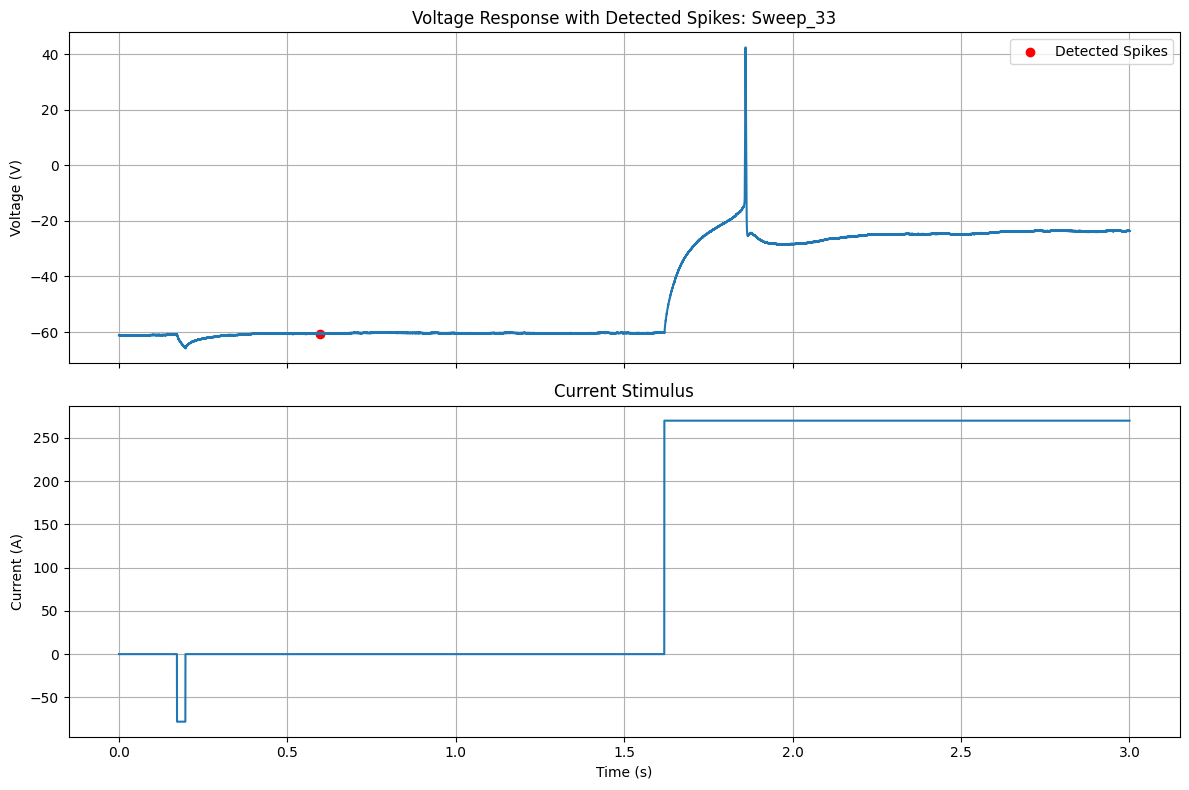

In [8]:
# Check if there's a spikes processing module
if hasattr(nwb, 'processing') and 'spikes' in nwb.processing:
    spikes_module = nwb.processing['spikes']
    print(f"Found spike detection module: {spikes_module.description}")
    
    # Find a sweep with detected spikes
    sweep_with_spikes = None
    spike_timestamps = None
    
    for sweep_name, sweep_data in spikes_module.data_interfaces.items():
        if len(sweep_data.timestamps[:]) > 0:
            sweep_with_spikes = sweep_name
            spike_timestamps = sweep_data.timestamps[:]
            break
    
    if sweep_with_spikes is not None:
        print(f"Found spike timestamps in {sweep_with_spikes}: {spike_timestamps}")
        
        # Try to find the corresponding recording
        sweep_num = int(sweep_with_spikes.split('_')[1]) if '_' in sweep_with_spikes else None
        
        if sweep_num is not None:
            # Look for the current clamp series with this sweep number
            matching_series = None
            for series_name in current_clamp_series:
                series = nwb.acquisition[series_name]
                if hasattr(series, 'sweep_number') and series.sweep_number == sweep_num:
                    matching_series = series
                    break
            
            if matching_series is not None:
                print(f"Found matching recording: {matching_series.name}")
                
                # Get a window of data around the first spike
                if len(spike_timestamps) > 0:
                    sampling_rate = 20000  # Assume 20 kHz
                    first_spike_time = spike_timestamps[0]
                    
                    # Create a window of 3 seconds centered on the spike
                    window_start = max(0, int((first_spike_time - 1.0) * sampling_rate))
                    window_size = int(3.0 * sampling_rate)
                    
                    if window_start + window_size <= matching_series.data.shape[0]:
                        # Get the data
                        window_data = matching_series.data[window_start:window_start+window_size]
                        window_time = np.arange(window_size) / sampling_rate + window_start / sampling_rate
                        
                        # Get stimulus data if available
                        stim_name = matching_series.name.replace('_AD0', '_DA0')
                        stim = nwb.stimulus.get(stim_name)
                        if stim is not None and window_start + window_size <= stim.data.shape[0]:
                            stim_data = stim.data[window_start:window_start+window_size]
                        else:
                            stim_data = None
                        
                        # Plot
                        fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
                        
                        # Plot voltage response
                        axes[0].plot(window_time, window_data)
                        
                        # Mark spikes
                        spike_y_values = []
                        visible_spikes = []
                        for spike_time in spike_timestamps:
                            if window_start/sampling_rate <= spike_time <= (window_start + window_size)/sampling_rate:
                                visible_spikes.append(spike_time)
                                # Find the voltage at this spike time
                                spike_idx = int((spike_time - window_start/sampling_rate) * sampling_rate)
                                if 0 <= spike_idx < len(window_data):
                                    spike_y_values.append(window_data[spike_idx])
                                else:
                                    spike_y_values.append(np.max(window_data))
                        
                        if len(visible_spikes) > 0:
                            axes[0].scatter(visible_spikes, spike_y_values, color='red', marker='o', label='Detected Spikes')
                            axes[0].legend()
                        
                        axes[0].set_ylabel('Voltage (V)')
                        axes[0].set_title(f'Voltage Response with Detected Spikes: {sweep_with_spikes}')
                        
                        # Plot stimulus if available
                        if stim_data is not None:
                            axes[1].plot(window_time, stim_data)
                            axes[1].set_xlabel('Time (s)')
                            axes[1].set_ylabel('Current (A)')
                            axes[1].set_title('Current Stimulus')
                        
                        plt.tight_layout()
                        plt.show()
                    else:
                        print(f"Window exceeds data limits. Data shape: {matching_series.data.shape}")
                else:
                    print("No spike timestamps found")
            else:
                print(f"Could not find matching recording for sweep {sweep_num}")
        else:
            print("Could not parse sweep number")
    else:
        print("No spike detection results found with actual spikes")
else:
    print("No spike detection module found")

## Examining Voltage Clamp Recordings

Voltage clamp recordings hold the membrane potential at a fixed value and measure the current required to maintain that voltage. This allows us to isolate specific ionic currents based on their voltage dependence.

Found 6 voltage-clamp recording series

Examining voltage clamp recording: data_00000_AD0
Stimulus description: EXTPSMOKET180424_DA_0
Unit: amperes
Starting time: 80.8120002746582
Data shape: (161000,)


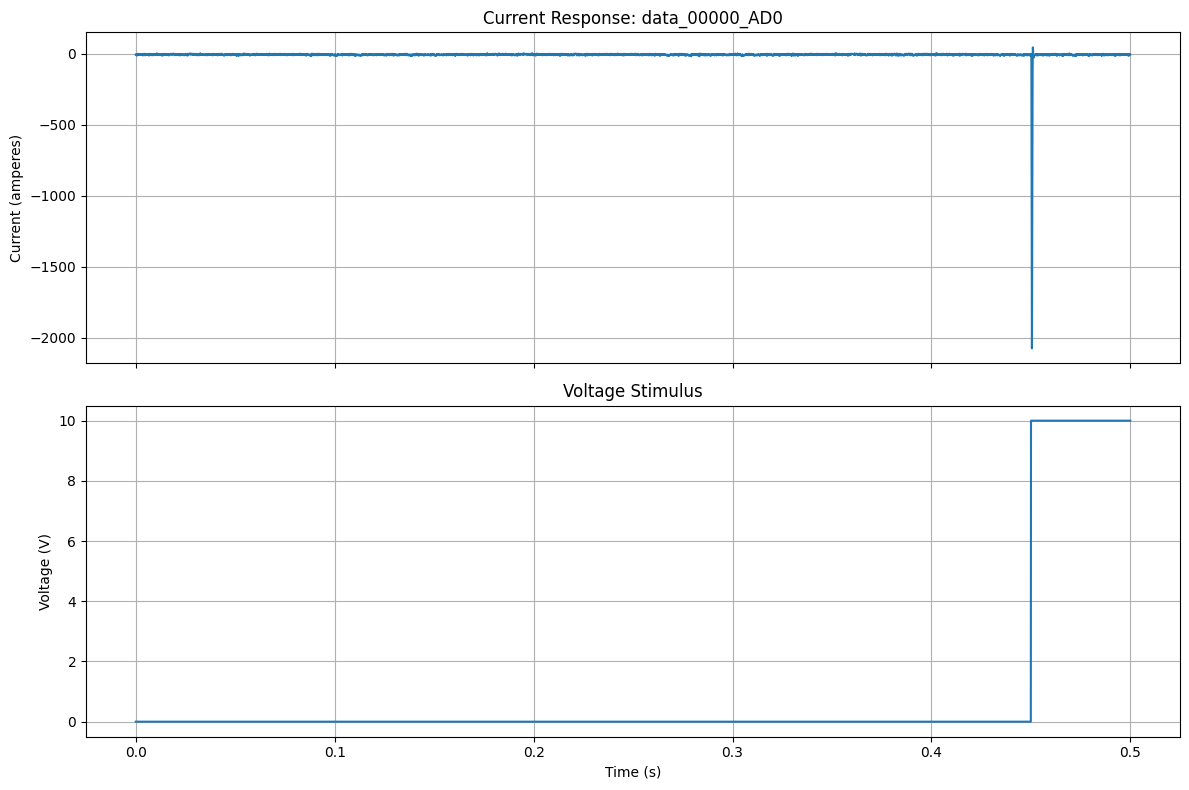

In [9]:
# Identify voltage-clamp recordings
voltage_clamp_series = []
for series_name in nwb.acquisition.keys():
    series = nwb.acquisition[series_name]
    if isinstance(series, pynwb.icephys.VoltageClampSeries):
        voltage_clamp_series.append(series_name)

print(f"Found {len(voltage_clamp_series)} voltage-clamp recording series")

# Let's examine one of these recordings
if voltage_clamp_series:
    # Choose the first voltage clamp recording
    series_name = voltage_clamp_series[0]
    series = nwb.acquisition[series_name]
    
    # Get the corresponding stimulus
    stim_name = series_name.replace('_AD0', '_DA0')
    stim = nwb.stimulus.get(stim_name)
    
    # Print information
    print(f"\nExamining voltage clamp recording: {series_name}")
    print(f"Stimulus description: {series.stimulus_description}")
    print(f"Unit: {series.unit}")
    print(f"Starting time: {series.starting_time}")
    print(f"Data shape: {series.data.shape}")
    
    # Get a portion of the data
    sample_size = 10000  # Show about 0.5 seconds at 20 kHz
    current_data = series.data[:sample_size]
    
    # Get the stimulus data
    if stim is not None:
        voltage_data = stim.data[:sample_size]
    else:
        voltage_data = None
    
    # Create time values (in seconds)
    sampling_rate = 20000  # Assume 20 kHz
    time_values = np.arange(sample_size) / sampling_rate
    
    # Plot
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Plot current response
    axes[0].plot(time_values, current_data)
    axes[0].set_ylabel(f'Current ({series.unit})')
    axes[0].set_title(f'Current Response: {series_name}')
    
    # Plot voltage stimulus
    if voltage_data is not None:
        axes[1].plot(time_values, voltage_data)
        axes[1].set_xlabel('Time (s)')
        axes[1].set_ylabel('Voltage (V)')
        axes[1].set_title('Voltage Stimulus')
    
    plt.tight_layout()
    plt.show()
else:
    print("No voltage clamp recordings found")

Voltage clamp recordings can reveal:

1. **Voltage-gated Currents**: By stepping the voltage to different levels, we can activate/inactivate specific ion channels
2. **Synaptic Currents**: Spontaneous or evoked currents from synaptic inputs
3. **Membrane Capacitance**: From the initial transient current when voltage is stepped

## Summary of Findings

This notebook demonstrates how to load and explore patch-clamp electrophysiology data from Dandiset 001359, which contains recordings from human neurons as part of the Allen Institute's patch-seq initiative.

Key findings and observations:

1. **Dataset Structure**: The NWB files contain both current-clamp and voltage-clamp recordings, with multiple protocols designed to probe different aspects of neuronal function.

2. **Current Clamp Recordings**: We observed:
   - Subthreshold responses that allow characterization of passive membrane properties
   - Action potential generation in response to stronger current injection
   - Detected spike times in the processing module

3. **Voltage Clamp Recordings**: We observed ionic currents flowing through the membrane while voltage was held constant, revealing the activity of various ion channels.

The dataset provides a rich resource for studying the electrophysiological properties of human neurons, particularly when combined with the transcriptomic data that would be available through the patch-seq approach.

## Future Directions

Here are some potential next steps for further analysis of this data:

1. **Quantitative Analysis of Membrane Properties**:
   - Calculate input resistance from voltage deflection during current steps
   - Measure membrane time constant from the response to step currents
   - Extract action potential parameters (threshold, amplitude, width) from suprathreshold recordings

2. **Classification of Cell Types**:
   - Compare electrophysiological properties across cells
   - Identify distinct cell types based on firing patterns

3. **Integration with Transcriptomic Data**:
   - Correlate electrophysiological properties with gene expression profiles
   - Identify molecular markers that correspond to specific electrical signatures

4. **Comparative Analysis**:
   - Compare these human neurons to similar recordings from other species
   - Look at how properties vary across brain regions or developmental stages

5. **Computational Modeling**:
   - Use the recorded data to constrain biophysical models of these neurons
   - Simulate network activity using the measured cellular properties

This notebook provides a starting point for exploring the rich electrophysiological data in Dandiset 001359. By leveraging the NWB format and the DANDI infrastructure, researchers can easily access and analyze this valuable dataset to gain insights into the properties of human neurons.